# COGS 118A- Project Checkpoint

# Names

Hopefully your team is at least this good. Obviously you should replace these with your names.

- Will Sumerfield
- Diego Maradonna
- Johan Cruyff
- Roberto Carlos
- Franz Beckenbaur

# Abstract 
This section should be short and clearly stated. It should be a single paragraph <200 words.  It should summarize: 
- what your goal/problem is
- what the data used represents and how they are measured
- what you will be doing with the data
- how performance/success will be measured

# Background
Heart disease is the leading cause of death in the United States, accounting for more than 696,000 deaths in 2020 alone. [1]. It is a disease that, if remedied proactively early, can be treated and/or alleviated. Hence, in order to best address the prominence of heart disease in the US, we must use leading technologies to help understand, predict, and detect indicators of heart disease in patients.

The technology of machine learning is already widely used in the field of medicine, including the domain of disease prediction & classification.

Prior Work:

1. Using patient information such as MRI scans, biomarkers, and numerical data about the patient, researchers have been able to develop a random forest classifier that predicts Alzheimer's Disease in its early stages up to an 85% accuracy [2]. The implications of this research are proactive care for those who are predicted to develop Alzheimer's disease.
2. Using feature selection and data cleaning techniques, researchers have been able to leverage to use of different machine learning models on multiple sources of data (meterological, epidemic, media data, etc.) to analyze, predict, and prevent the spread of infectious diseases [3].
3. Finally, within the space of heart disease classification, researchers have already developed machine learning and deep learning models to predict heart disease. Using a Heart Disease dataset from UCI, researchers have been able to leverage deep learning techniques to achieve a 94% accuracy in predicting heart disease [4].

As demonstrated in the previous research that has been done in this field, many different models and data science techniques have been employed in the objective of disease classification. It's important that we understand how we can use the leading technology of machine learning to best predict and classify health conditions, like heart disease, in order to promote healthy habits and preventative measure for those who are at risk. This facet of understanding motivates the purpose of our project.

[1] https://www.cdc.gov/nchs/fastats/leading-causes-of-death.htm
[2] https://www.frontiersin.org/articles/10.3389/fpubh.2022.853294/full#:~:text=The%20Machine%20Learning%20techniques%20(26,algorithms%20(28%2C%2029).
[3] https://www.ncbi.nlm.nih.gov/pmc/articles/PMC8219638/
[4] https://www.hindawi.com/journals/cin/2021/8387680/


# Problem Statement

The supervised machine learning problem we will be solving will be to try and classify whether a given patient has “ever reported having coronary heart disease (CHD) or myocardial infarction (MI)” based on a number of selected health/heart disease risk factors. The overall problem we want to address, however, is comparing how various supervised models perform on this specific prediction task and determining the best and worst performing ones. The models we’ll be comparing are 


# Data

UPDATED FROM PROPOSAL!

You should have obtained and cleaned (if necessary) data you will use for this project.

Please give the following infomration for each dataset you are using
- link/reference to obtain it
- description of the size of the dataset (# of variables, # of observations)
- what an observation consists of
- what some critical variables are, how they are represented
- any special handling, transformations, cleaning, etc you have done should be demonstrated here!


### Imports

In [40]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

### Data General Knowledge

As we can see below, our dataset is a collection of information related to heart health. The first column is a *True*
or *False* value which tells us whether that row's person has some form of heart disease. This is the variable we will
be trying to predict with our models, based on the information the other features provide.

We can see below that we have 17 different features with which to predict heart disease, and over 300,000 data points!

In [41]:
# Import the data as a dataframe
data = pd.read_csv("data/raw_data.csv")

# Display the number of columns in the dataframe
print(f"Number of Raw Features: {len(data.columns)}")
print()
print(f"Number of Datapoints: {data.shape[0]}")
print()

# Display the head of the dataframe
data.head()

Number of Raw Features: 18

Number of Datapoints: 319795



,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No


### Data Visualization

In order to see what our data looks like, and correlations between the features and heart disease, we can plot or
display each feature against Heart Disease.

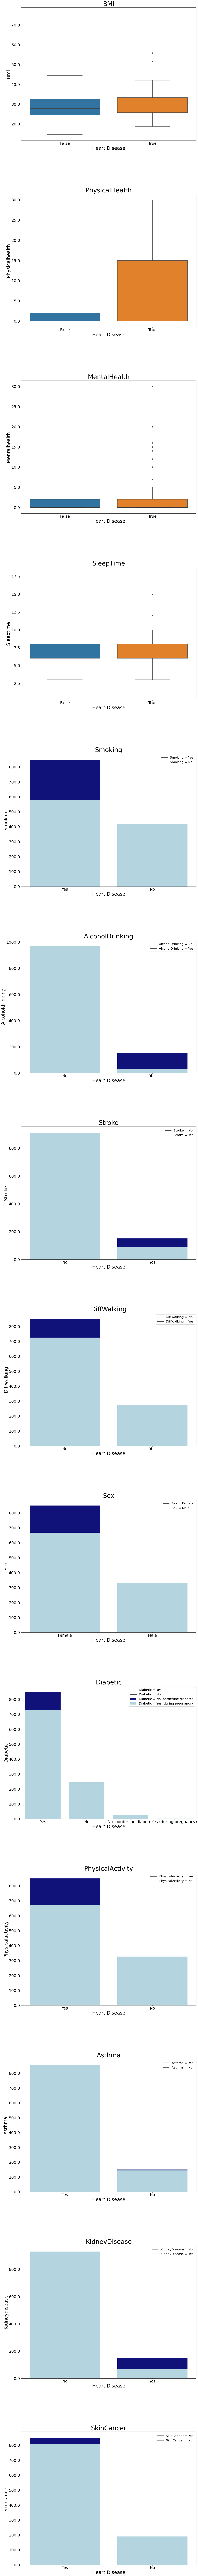

In [90]:
# Get a subset of the data for graphing
data = data.iloc[0:1000, :]

# Get the heart disease data
heart_disease = data["HeartDisease"]

# Get all continuously valued features
continuous_features = ['BMI', 'PhysicalHealth', 'MentalHealth', 'SleepTime']

# Get all boolean features
boolean_features = ['Smoking', 'AlcoholDrinking', 'Stroke', 'DiffWalking', 'Sex', 'Diabetic', 'PhysicalActivity',
                    'Asthma', 'KidneyDisease', 'SkinCancer']

# Get all nominal features
nominal_features = ['Race', 'AgeCategory', 'GenHealth']

# Create a subplot for each feature in the dataset
fig, axes = plt.subplots(len(continuous_features) + len(boolean_features), figsize=(20, 300))

# Adjust the spacing between plots
fig.subplots_adjust(hspace=0.4)

# Graph each continuous feature
for index in range(len(continuous_features)):

    # Find the axis and feature
    axis = axes[index]
    feature = continuous_features[index]

    # Plot the feature against heart disease
    sns.boxplot(x=heart_disease, y=feature, data=data, ax=axis)
    axis.set_title(feature, fontsize=40)
    axis.set_yticklabels(axis.get_yticks(), size=25)
    axis.set_xticklabels(['False', 'True'], size=25)
    axis.set_ylabel(feature.capitalize(), fontsize=30)
    axis.set_xlabel("Heart Disease", fontsize=30)

# Graph each boolean feature
for index in range(len(boolean_features)):

    # Find the axis and feature
    axis = axes[index+len(continuous_features)]
    feature = boolean_features[index]

    # Plot the feature against heart disease
    sns.barplot(x=heart_disease.unique(), y=heart_disease.value_counts().tolist(), ax=axis, color='darkblue')
    sns.barplot(x=data[feature].unique(), y=data[feature].value_counts().tolist(), estimator=sum, ci=None, ax=axis, color='lightblue')
    axis.set_title(feature, fontsize=40)
    axis.set_yticklabels(axis.get_yticks(), size=25)
    axis.set_xticklabels(labels=axis.get_xticklabels(), size=25)
    axis.set_ylabel(feature.capitalize(), fontsize=30)
    axis.set_xlabel("Heart Disease", fontsize=30)
    axis.legend(labels=[f'{feature} = {category}' for category in data[feature].unique()], fontsize=20)

# Display all the plots
plt.show()

# Proposed Solution

In this section, clearly describe a solution to the problem. The solution should be applicable to the project domain and appropriate for the dataset(s) or input(s) given. Provide enough detail (e.g., algorithmic description and/or theoretical properties) to convince us that your solution is applicable. Make sure to describe how the solution will be tested.  

If you know details already, describe how (e.g., library used, function calls) you plan to implement the solution in a way that is reproducible.

If it is appropriate to the problem statement, describe a benchmark model<a name="sota"></a>[<sup>[3]</sup>](#sotanote) against which your solution will be compared. 

# Evaluation Metrics

Propose at least one evaluation metric that can be used to quantify the performance of both the benchmark model and the solution model. The evaluation metric(s) you propose should be appropriate given the context of the data, the problem statement, and the intended solution. Describe how the evaluation metric(s) are derived and provide an example of their mathematical representations (if applicable). Complex evaluation metrics should be clearly defined and quantifiable (can be expressed in mathematical or logical terms).

We will use 3 different metrics to assess the performance of our models on our task of Heart Disease Prediction/Classification.

The first metric we will use is Recall/Sensitivity (formula shown below). We will use this metric to assess performance of our task because recall measures the model's ability to classify the true positives in its predictions. This is relevant to the problem we are solving because we want our model to miss as few truly heart disease-prone individuals as possible. It is very expensive to miss a true positive (miss a heart disease prone patient) in this context.

The second metric we will consider is Precision (formula shown below). We will use this metric to measure the performance of our model because it tells us how many predicted positives are actually positive. In the context of our problem, this metric answers the question: How many patients predicted to have heart disease actually had heart disease? Recall is a measure that can benefit from biasing predictions toward all true, so we use Precision to ensure that our model is still making balanced and accurate predictions.

![Precision and Recall](assets/PrecisionRecall_formula.png)

The last metric we will consider is F1 as it is the harmonic balance between Precision and Recall. We use F1 to make sure that our models predictions are measuring Prediction and Recall in a balanced manner, so that we assess if our model is biased towards predicting heart disease or non heart disease.

![F1](assets/F1_formula.png)

In the evaluation of our models, we will primarily be looking at Recall/Sensitivity, as it is the most relevant metric to the problem we are trying to address, which is the prediction/classification of heart disease. However, we will take the other two metrics into account as they provide information into the general accuracy of our model.



# Preliminary results

NEW SECTION!

Please show any preliminary results you have managed to obtain.

Examples would include:
- Analyzing the suitability of a dataset or alogrithm for prediction/solving your problem 
- Performing feature selection or hand-designing features from the raw data. Describe the features available/created and/or show the code for selection/creation
- Showing the performance of a base model/hyper-parameter setting.  Solve the task with one "default" algorithm and characterize the performance level of that base model.
- Learning curves or validation curves for a particular model
- Tables/graphs showing the performance of different models/hyper-parameters



# Ethics & Privacy

When developing machine learning applications, its important to be aware and proactive against ethics and privacy concerns. The dataset we use does not include Personal Identifiable Information (PII), which helps ensure that the privacy of patients and kept.

Ethical concerns can arise in the results processing and analysis stage. Its important that the results are validated to make sure they are reasonable, so that possible correlations in the underlying data are pursued and percieved to be truth. For example, if a correlation between race and diabeties is found, its important to not jump to conclusions and declare causality/truth behind the correlation.

Additionally, we need to make sure that the data we use to train our model is representative of the general population, so that we can best fit our model to classify heart disease in patients with different types of backgrounds .

In the field of medicine, its important that our product is tested and verified in the interest of liability. While it is important that we miss as few positively predicted heart disease patients in our model, we need to make sure that our model doesn't overly classify non heart disease prone patients as positive as this would lead to resources and facilities being directed toward those who don't need it.

In the field, it is possible that this product may produce some unintended consequences relating to ethics or privacy. If this product is release into the field, we will make sure to address any unintended outcomes breaching ethical or privacy concerns by working to understand why such breaches occurred and being proactive about alleviating such conerns.

# Team Expectations 

Put things here that cement how you will interact/communicate as a team, how you will handle conflict and difficulty, how you will handle making decisions and setting goals/schedule, how much work you expect from each other, how you will handle deadlines, etc...
* *Team Expectation 1*
* *Team Expectation 2*
* *Team Expecation 3*
* ...

# Project Timeline Proposal

UPDATE THE PROPOSAL TIMELINE ACCORDING TO WHAT HAS ACTUALLY HAPPENED AND HOW IT HAS EFFECTED YOUR FUTURE PLANS

| Meeting Date  | Meeting Time| Completed Before Meeting  | Discuss at Meeting |
|---|---|---|---|
| 1/20  |  1 PM |  Brainstorm topics/questions (all)  | Determine best form of communication; Discuss and decide on final project topic; discuss hypothesis; begin background research | 
| 1/26  |  10 AM |  Do background research on topic (Pelé) | Discuss ideal dataset(s) and ethics; draft project proposal | 
| 2/1  | 10 AM  | Edit, finalize, and submit proposal; Search for datasets (Beckenbaur)  | Discuss Wrangling and possible analytical approaches; Assign group members to lead each specific part   |
| 2/14  | 6 PM  | Import & Wrangle Data ,do some EDA (Maradonna) | Review/Edit wrangling/EDA; Discuss Analysis Plan   |
| 2/23  | 12 PM  | Finalize wrangling/EDA; Begin programming for project (Cruyff) | Discuss/edit project code; Complete project |
| 3/13  | 12 PM  | Complete analysis; Draft results/conclusion/discussion (Carlos)| Discuss/edit full project |
| 3/19  | Before 11:59 PM  | NA | Turn in Final Project  |

# Footnotes
<a name="lorenznote"></a>1.[^](#lorenz): Lorenz, T. (9 Dec 2021) Birds Aren’t Real, or Are They? Inside a Gen Z Conspiracy Theory. *The New York Times*. https://www.nytimes.com/2021/12/09/technology/birds-arent-real-gen-z-misinformation.html<br> 
<a name="admonishnote"></a>2.[^](#admonish): Also refs should be important to the background, not some randomly chosen vaguely related stuff. Include a web link if possible in refs as above.<br>
<a name="sotanote"></a>3.[^](#sota): Perhaps the current state of the art solution such as you see on [Papers with code](https://paperswithcode.com/sota). Or maybe not SOTA, but rather a standard textbook/Kaggle solution to this kind of problem
